In [1]:
# read in the iris data (load it from the built-in package): iris
from sklearn.datasets import load_iris
data = load_iris()
type(data)
y = data.target
y.shape
X = data.data
X.shape

(150, 4)

In [2]:
# use the KNeighborsClassifier to create the knn model: knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,y)



# fit the model (on the train data)



# do prediction on the X_test dataset: y_pred
predict = neigh.predict(X)


# calculate the accuracy of the model, use the accuracy_score function
correct = 0
for i in range(len(y)):
  if y[i] == predict[i]:
    correct+=1;
print(correct, len(y))

150 150


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [4]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred = predict = neigh.predict(X_test)

from sklearn.metrics import accuracy_score
y_true = y_test
accuracy_score(y_true, y_pred)

0.9666666666666667

In [5]:
# Create an empty list for the scores: scores
scores = []
trainscores = []

# use a loop through the range 1 to 26
# create a knn model in each step, fit the model and do prediction
# append the accuracy scores in the list
for i in range(1,26):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_true, y_pred))

  #y_pred = knn.predict(X_train)
  #trainscores.append(accuracy_score(y_train, y_pred))

# print the scores
print(scores)
print(trainscores)

[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[]


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [7]:
import numpy as np
import pandas as pd

from sklearn.datasets import *
import matplotlib.pyplot as plt

In [9]:
diabetes = pd.read_csv("/data.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'> (614, 8) <class 'pandas.core.series.Series'> (154,)
0.6753246753246753
[[81 19]
 [31 23]]


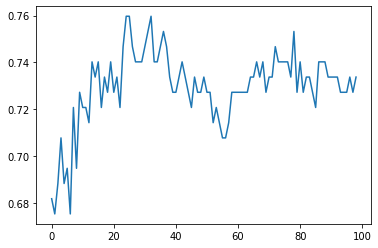

In [10]:
y = diabetes['Outcome']
X = diabetes.drop(['Outcome'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
print(type(X_train), X_train.shape, type(y_test), y_test.shape)

knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

scores = []
for i in range(1,100):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

plt.plot(scores)
plt.show()

In [11]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(24)

cv_results = cross_validate(knn, X, y, cv = 10)

print(cv_results)

{'fit_time': array([0.01015687, 0.00866246, 0.00551248, 0.00532579, 0.00503635,
       0.00506568, 0.00504971, 0.00516224, 0.0051074 , 0.00493598]), 'score_time': array([0.01729679, 0.00967646, 0.00887251, 0.00873852, 0.00832844,
       0.00834846, 0.00866652, 0.00792146, 0.0082624 , 0.00837111]), 'test_score': array([0.76623377, 0.71428571, 0.7012987 , 0.64935065, 0.68831169,
       0.77922078, 0.75324675, 0.81818182, 0.76315789, 0.80263158])}


In [12]:
cv_results['test_score'].mean()

0.7435919343814081

In [16]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

cancer_data = pd.read_csv('/data.txt', names = col_names)

y = cancer_data['Class']
X = cancer_data.drop('Id', axis=1).drop('Class', axis=1)

print(X)
#X_np = X.to_numpy().astype(np.float32)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                    1                            2           1   
1                    5               